# Matplotlib- 기본 그래프 도구
## 선 그래프

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('./시도별 전출입 인구수.xlsx', engine = 'openpyxl', header=0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [2]:
# 누락값(NAN)을 앞 데이터로 채움(엑셀 양식 병합부분)
df = df.fillna(method = 'ffill')
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace=True)
df_seoul.head(8)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813


In [3]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

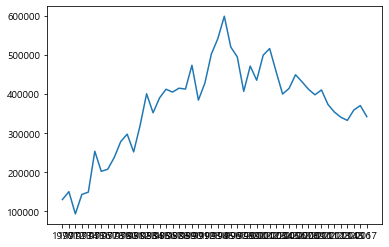

In [4]:
# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

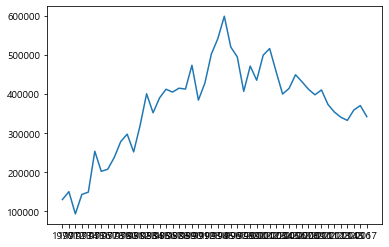

In [5]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

### 차트 제목, 축 이름 추가
그래프 객체에 차트 제목을 추가할 때는 title() 함수를 사용한다.  
x축 이름은 xlabel() 함수를 이용하고, y축 이름은 ylabel() 함수를 활용하여 추가한다.

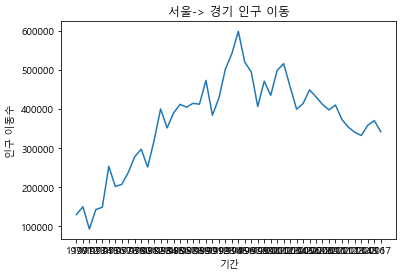

In [6]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울-> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('인구 이동수')
plt.show() #변경사항 저장하고 그래프 출력

### 맥OS 사용시 한글 폰트 지정 방법
맥OS의 경우 다음 코드와 같이 맥OS 폰트를 rc명령에 직접 지정하는 방법을 사용한다.  
1. matplotlib 한글 폰트 오류 문제 해결
2. from matplotlib import rc
3. rc('font', family='AppleGothic')

### 그래프 꾸미기
x출 눈금 라벨의 글씨가 서로 겹쳐 잘 보이지 않는 문제를 해결하는 방법을 알아보자.  
이것은 눈금 라벨이 들어갈 만한 충분한 여유 공간이 없어서 발생하는 문제이다.  
- 글씨가 들어갈 수 있는 공간을 확보하기 위해 두 가지 방법 적용
    - 공간을 만들기 위해 figure() 함수로 그림틀의 가로 사이즈를 더 크게 설정
    - xticks()함수를 활용하여 x축 눈금 라벨을 반시계반향으로 90도 회전하여 글씨가 서로 겹치지 않게 만든다.

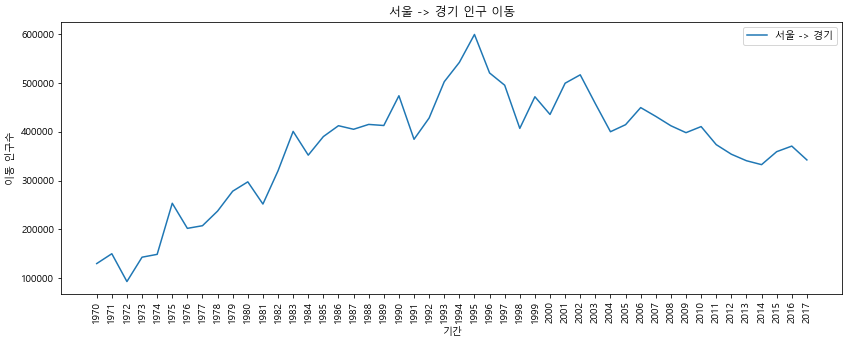

In [7]:
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') # 차트 제목
plt.xlabel('기간') #x축 이름
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기'], loc='best') #범례 표시

plt.show() #변경사항 저장하고 그래프 출력

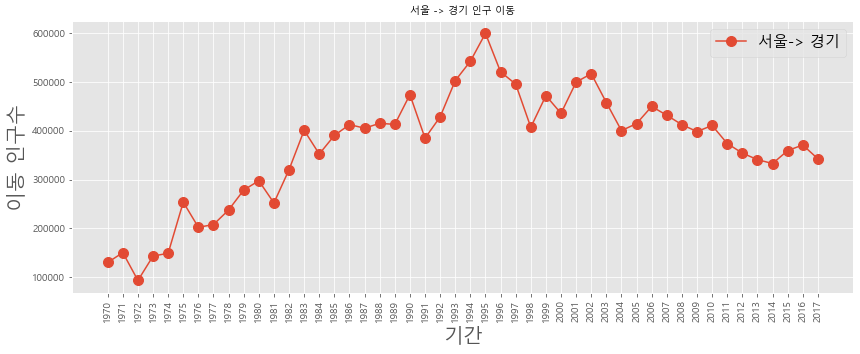

In [8]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size = 10) # 차트 제목
plt.xlabel('기간', size = 20) #x축 이동
plt.ylabel('이동 인구수', size = 20)  #y축 이동

plt.legend(labels = ['서울-> 경기'], loc='best', fontsize=15)

plt.show()

### Matplotlib 스타일 서식의 종류
`ggplot` 외에도 많은 종류의 스타일 서식이 지원된다.  
- 스타일의 종류: 'classic', 'bmh', 'dark_background', 'fast', 'grayscale', 'seaborn' 등

In [9]:
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


스타일이 어떻게 적요오디는지 상세한 정보가 필요하다면 다음의 링크를 참조한다.
- 참조: <https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html>
상세 옵션에 대한 정보는 다음의 링크를 참조한다.
- 참조: <https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html>

In [10]:
# y축 범위 지정(최솟값, 최댓값)
plt.ylim(50000, 80000)

# 주석 표시 - 화살표
plt.annotate('',
            xy = (20, 620000), #화살표의 머리 부분(끝점)
            xytext = (2, 290000), # 화살표의 꼬리 부분(시작점)
            xycoords = 'data', # 좌표체계
            arrowprops = dict(arrowstyle='->', color = 'skyblue', lw=5), # 화살표 서식
            )
plt.annotate('',
            xy = (47, 450000),
            xytext = (30, 580000),
            xycoords = 'data',
            arrowprops = dict(arrowstyle = '->', color = 'olive', lw=5),
            )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970~1995)', # 텍스트 입력
            xy = (10,550000), # 텍스트 위치 기준점
            rotation = 25, # 텍스트 회전 각도
            va = 'baseline', # 텍스트 상하 정렬
            ha = 'center', #텍스트 좌우 정렬
            fontsize = 15,
            )

plt.annotate('인구 이동 감소(1995~2017)',
            xy = (40, 560000),
            rotation = 11,
            va = 'baseline',
            ha = 'center',
            fontsize = 15,
            )
plt.show() # 변경사항 저장하고 그래프 출력

### 화면 분할하여 그래프 여러 개 그리기 - axe 객체 활용
화면을 여러 개로 분할하고 분할된 각 화면에 서로 다른 그래프를 그리는 방법이다.  
여러 개의 axe 객체를 만들고, 분할된 화면마다 axe 객체를 하나씩 배정한다.  
axe 객체는 각각 서로 다른 그래프를 표현할 수 있다.  
한 화면에서 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줄 때 사용하면 좋다.  
단, axe 객체를 1개만 생성하는 경우에는 하나의 그래프만 표시된다.  

<ipython-input-11-fbfc8a0c978f>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 75)
<ipython-input-11-fbfc8a0c978f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


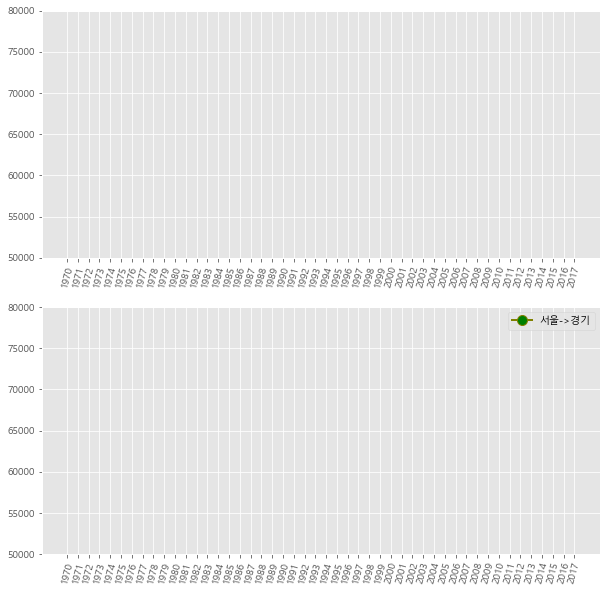

In [11]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize = 10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize = 10,
        color = 'olive', linewidth=2, label='서울->경기')
ax2.legend(loc='best')

# y축 범위 지정(최솟값, 최댓값)
ax1.set_ylim(50000, 80000)
ax2.set_ylim(50000, 80000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show() #변경사항 저장하고 그래프 출력

### 선그래프 꾸미기 옵션


| 꾸미기옵션 | 설명 |
|------------|------|
|'o'| 선 그래프가 아니라 점 그래프로 표현|
|marker = 'o'| 마커 모양 (예: 'o', '+', '-')|
|markerfacecolor='green'| 마커 배경색|
|markersize = 10 | 마커 크기 |
|color = 'olive'|선의 색|
|linewidth=2|선의 두께|
|label='서울 -> 경기'|라벨지정|


<ipython-input-12-dac891a7859e>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


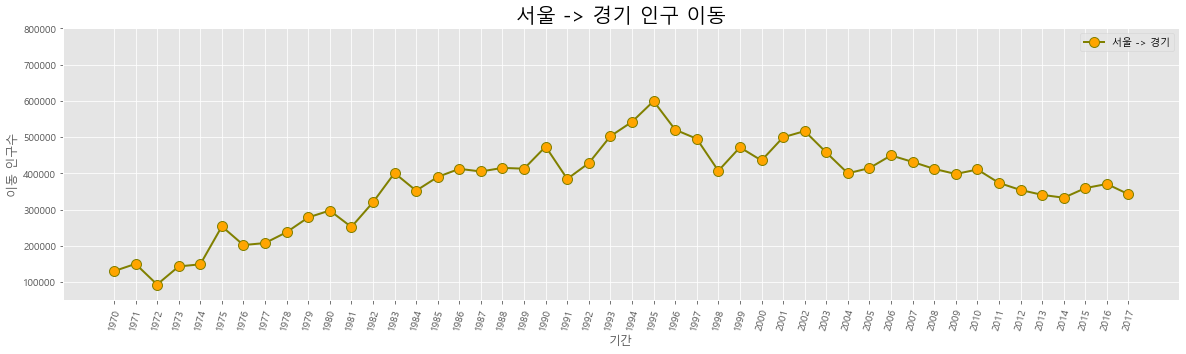

In [12]:
# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10,
       color = 'olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

# y축 범위 지정(최솟값, 최댓값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# ㅊ축 눈금 라벨 크기
ax.tick_params(axis = 'x', labelsize=10)
ax.tick_params(axis = 'y', labelsize=10)

plt.show() #변경사항 저장하고 그래프 출력

<ipython-input-13-7a73db2ad230>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


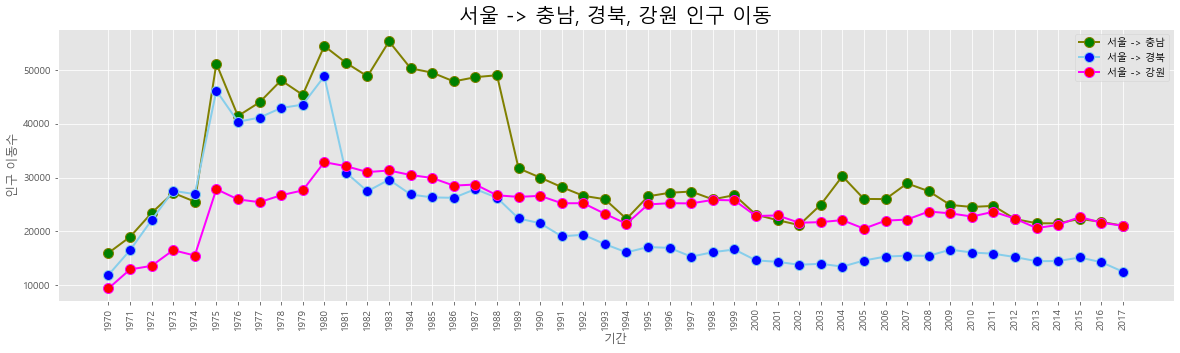

In [13]:
# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize= (20,5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
       markersize=10, color = 'olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
       markersize=10, color = 'skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
       markersize=10, color = 'magenta', linewidth=2, label='서울 -> 강원')

# 범례표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('인구 이동수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show() #변경사항 저장하고 그래프 출력

<ipython-input-14-4a3a8c1965be>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-14-4a3a8c1965be>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-14-4a3a8c1965be>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-14-4a3a8c1965be>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


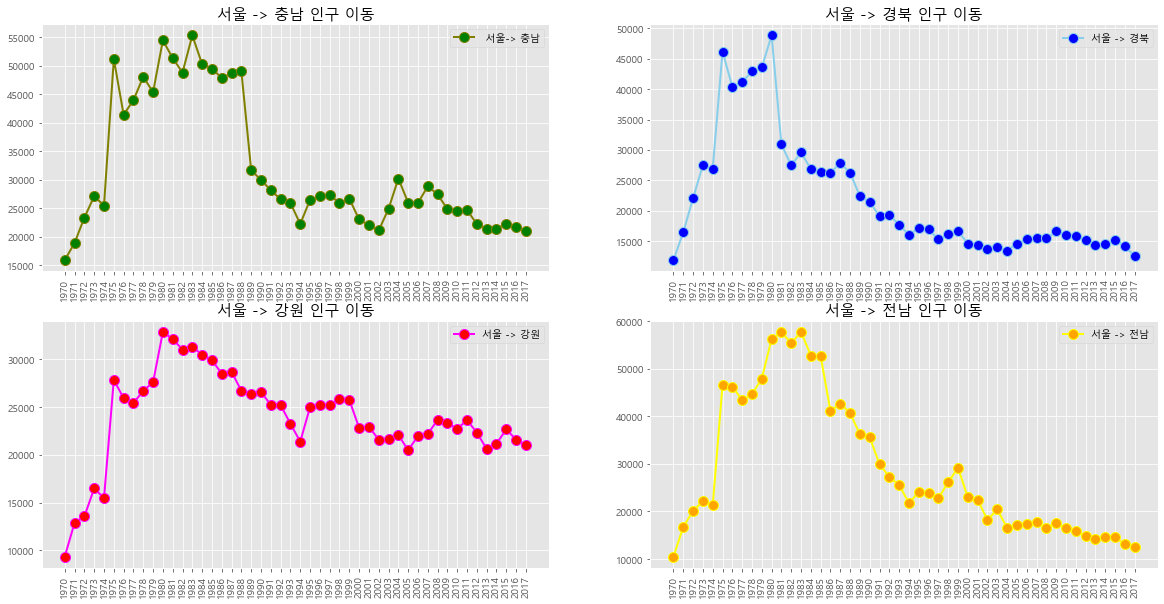

In [14]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도', :], marker='o', markerfacecolor='green',
         markersize=10, color = 'olive', linewidth=2, label=' 서울-> 충남')
ax2.plot(col_years, df_4.loc['경상북도', :], marker='o', markerfacecolor='blue',
        markersize = 10, color ='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도', :], marker='o', markerfacecolor='red',
        markersize = 10, color = 'magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도', :], marker='o', markerfacecolor='orange',
        markersize=10, color = 'yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size = 15)
ax2.set_title('서울 -> 경북 인구 이동', size = 15)
ax3.set_title('서울 -> 강원 인구 이동', size = 15)
ax4.set_title('서울 -> 전남 인구 이동', size = 15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show() # 변경사항 저장하고 그래프 출력

In [15]:
'''
matplotlib 스타일 리스트 출력
'''
import matplotlib

# 컬러 정보를 담은 빈 딕셔너리 생성
colors = {}

# 컬러 이름과 헥사코드 확인하여 딕셔너리에 입력
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex

# 딕셔너리 출력
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

## 면적 그래프
면적 그래프(area plot)는 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색이 입혀진다.  
색의 투명도(alpha)는 기본값 0.5로 투과되어 보인다.(투명도 0~1 범위)
선 그래프를 그리는 plot() 메소드에 kind='area' 옵션을 추가하면 간단하게 그릴 수 있다.  
그래프를 누적할지 여부를 설정할 수 있는데, 기본값은 stacked=True 옵션이다. 각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아 올리는 방식으로 표현된다.

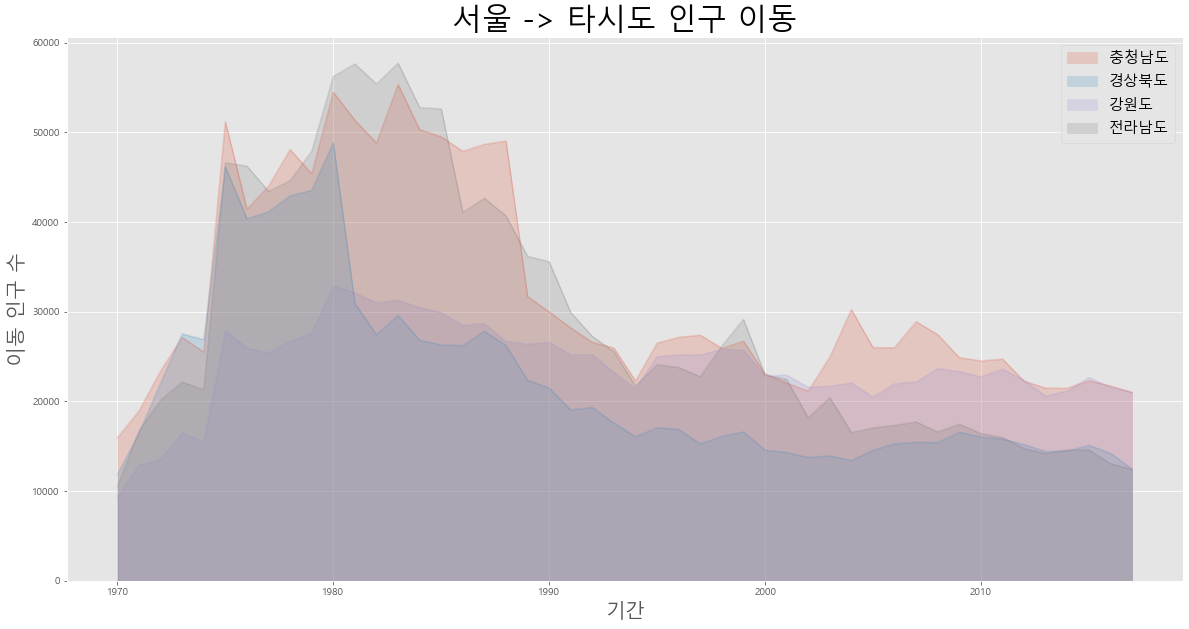

In [16]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_yeares = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size =20)
plt.legend(loc='best', fontsize=15)

plt.show()

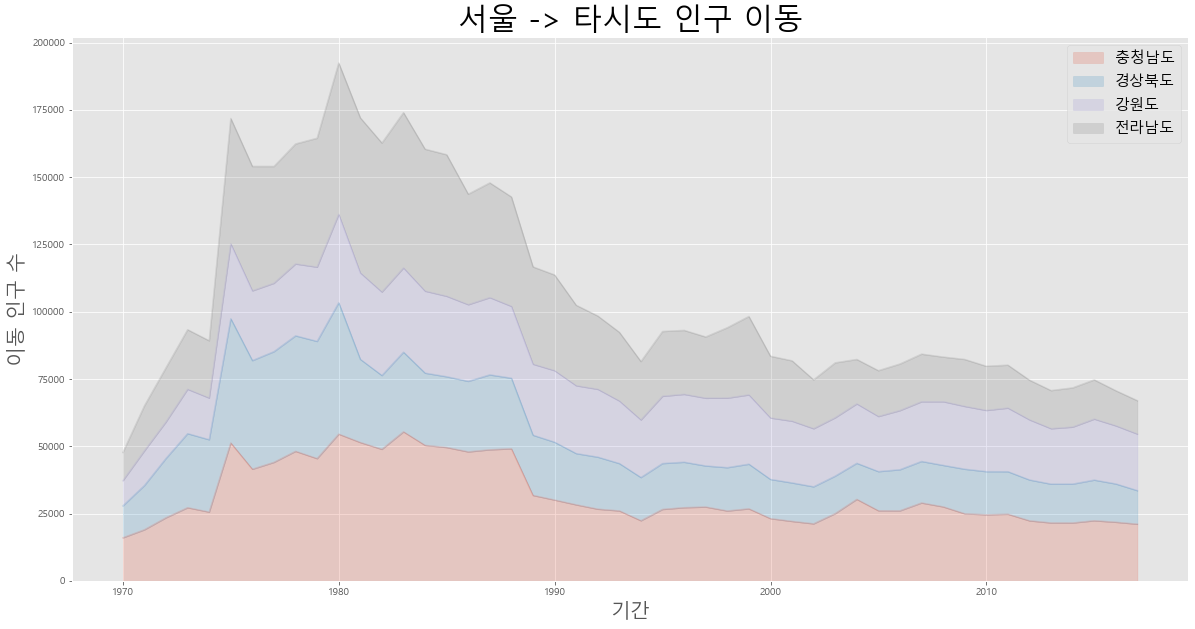

In [17]:
# 데이터프레임의 인덱스를 정수형으로 변경(x축 f눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha = 0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size = 20)
plt.legend(loc='best', fontsize=15)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


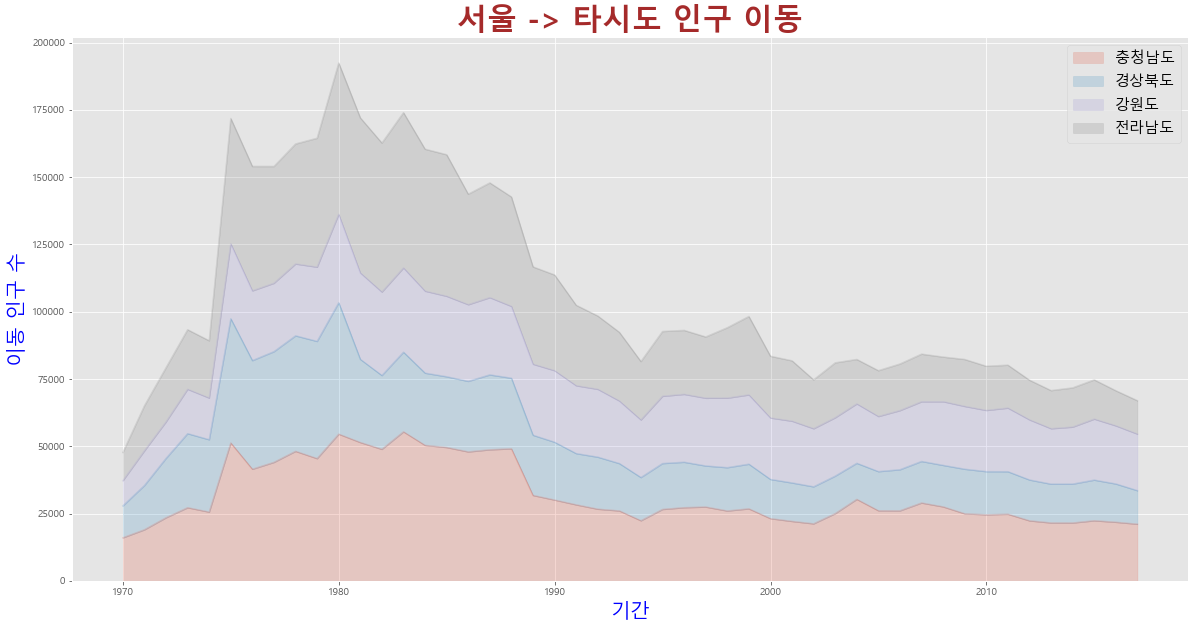

In [18]:
# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 axe 객체 생성
ax = df_4.plot(kind='area', stacked=True, alpha = 0.2, figsize = (20,10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size = 30, color = 'brown', weight='bold')
ax.set_ylabel('이동 인구 수', size = 20, color = 'blue')
ax.set_xlabel('기간', size = 20, color = 'blue')
ax.legend(loc='best', fontsize=15)
plt.show()

## 막대 그래프

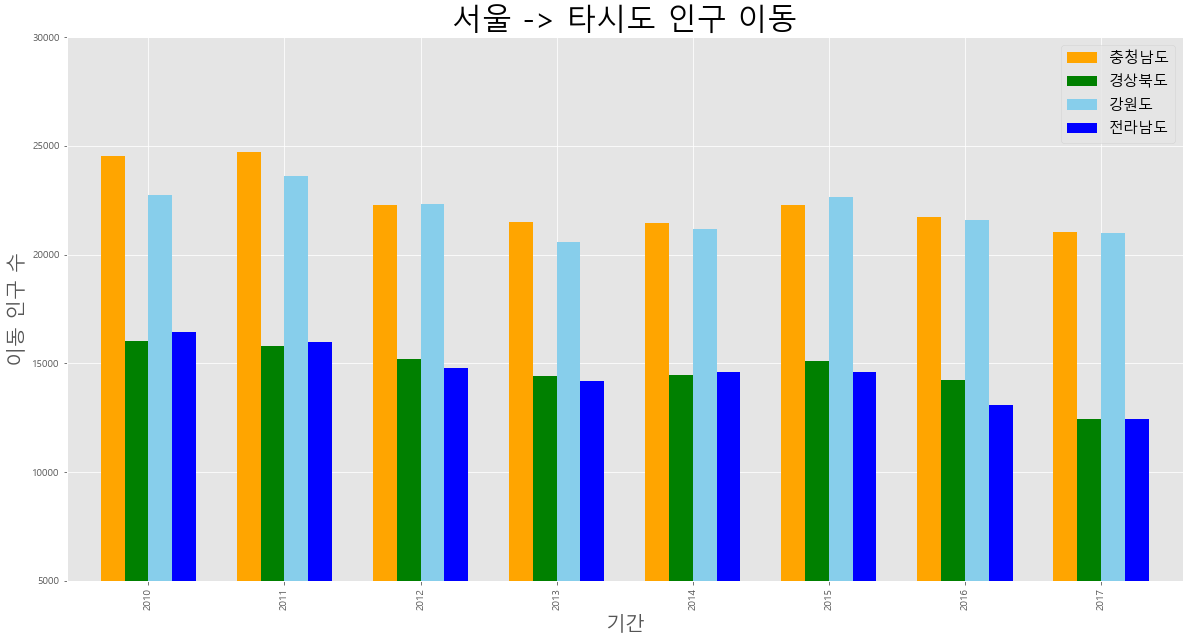

In [19]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width = 0.7,
         color = ['orange', 'green', 'skyblue', 'blue'])
plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size = 20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)
plt.show()

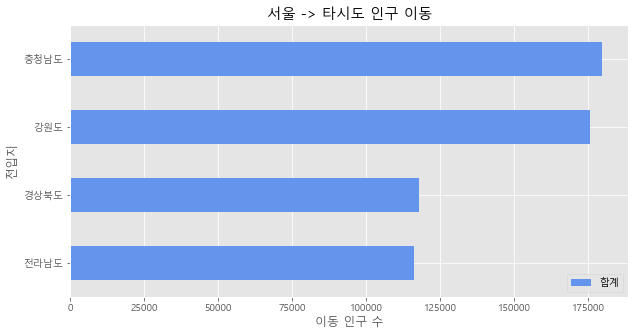

In [20]:
# 서울에서 '충청남도', '경상북도', '강원도', '전라남도' 로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그래프
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))
plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

### 보조 축 활용하기(2축 그래프 그리기)
지금까지는 그래프를 그릴 때 y축 한 개만 사용하였다. Excel에서 차트를 그릴 때처럼 보조 축을 추가하여 2개의 y축을 갖는 그래프를 그릴 수 있다.

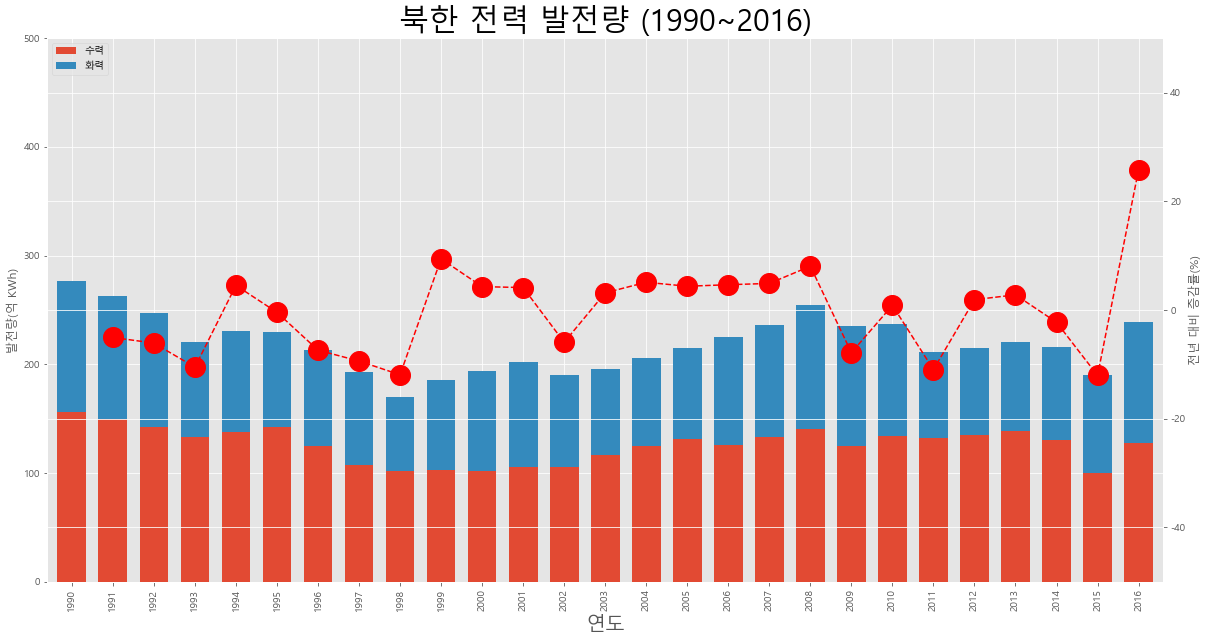

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.style.use('ggplot') # 스타일 서식 지정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('./남북한발전전력량.xlsx', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감률(변동률) 계산
df = df.rename(columns = {'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년']) -1)*100

# 2축 그래프 그리기
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20,
        color = 'red', label = '전년대비 증감률(%)')
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')
plt.title('북한 전력 발전량 (1990~2016)', size=30)
ax1.legend(loc='upper left')

plt.show()



- 2015년 수력 발전량이 일시적으로 급감한 사실이 있다. 기사를 검색해 보면 2015년에 북한의 가뭄이 심각했다는 뉴스를 찾아볼 수 있다.

## 히스토그램
- 히스토그램(histogram)은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현한다.  
- x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수(빈도)를 y축에 표시한다.  
- 구간을 나누는 간격의 크기에 따라 빈도가 달라지고 히스토그램의 모양의 변한다.

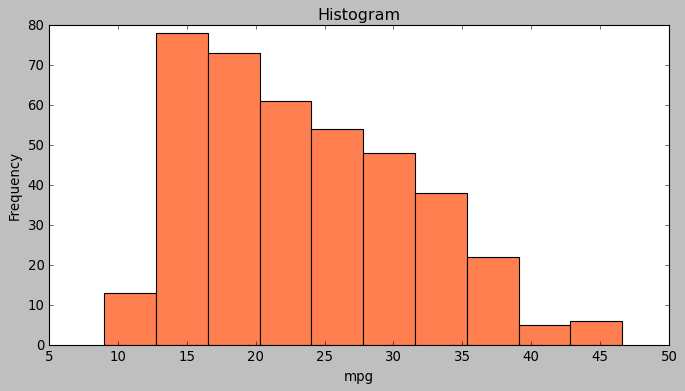

In [22]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic') # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

## 산점도
산점도(scatter plot)는 서로 다른 두 변수 사이의 관계를 나타낸다.  
이 때 각 변수는 연속되는 값을 갖는다. 일반적으로 정수형(int64) 또는 실수형(float64) 값이다. 2개의 연속 변수를 각각 x축과 y축에 하나씩 놓고, 데이터 값이 위치하는 (x, y)좌표를 찾아서 점으로 표시한다.  
두 연속 변수의 관계를 보여준다는 점에서 선 그래프와 비슷하다. 선 그래프를 그릴 때 plot() 메소드에 'o' 옵션을 사용하면 선 없이 점으로만 표현되는데, 사실상 산점도라고 볼 수 있다.

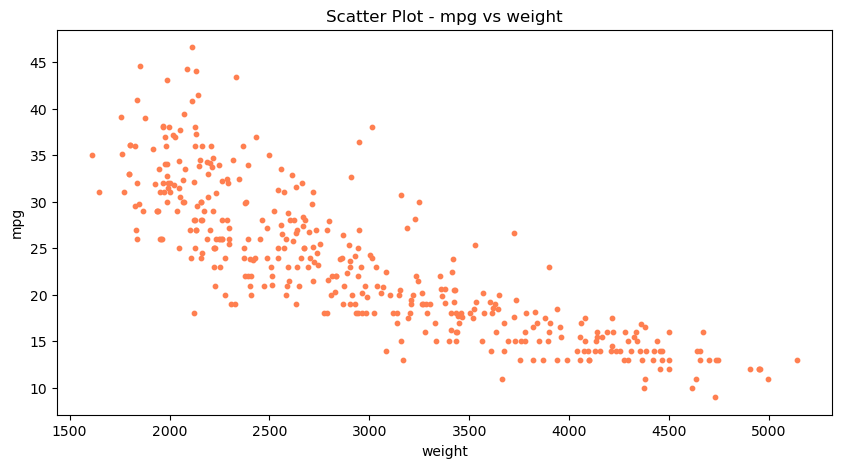

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']

# 연비 (mpg) 와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

#### 버블차트
앞에서 자동차 무게와 연비 사이의 간계를 산점도로 표현하였다. 여기에 새로운 변수를 추가해서 점의 크기 또는 색상으로 표현할 수 있다.  
여기서는 3번째 변수로 실린더 개수('cylinders'열)을 추가해 보자.  
실린더 개수를 나타내는 정수를 그대로 쓰는 대신, 해당 열의 최댓값 대비 상대적 크기를 나타내는 비율을 계산하여 cylinders_size 변수에 저장한다.  
cylinders_size는 0~1 범위의 실수 값의 배열(시리즈)이다. 점의 크기를 정하는 s 옵션에 cylinders_size를 입력하여 값의 크기에 따라 점의 크기를 값에 따라 다르게 표시한다. 이처럼 점의 크기에 변화를 주면 모양이 비눗방울 같다고 해서 버블(bubble) 차트라고 부르기도 한다.

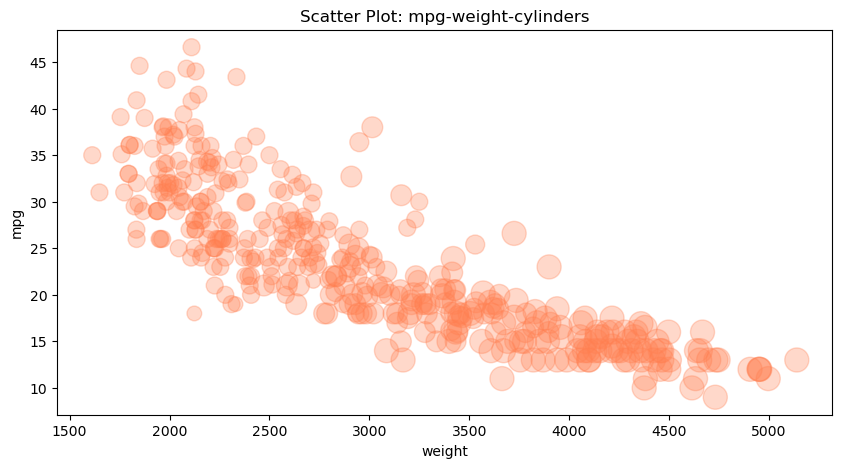

In [24]:
# cylinders 개수이 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10,5),
       s=cylinders_size, alpha = 0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

### 그래프를 그림 파일로 저장
Matplotlib 라이브러리로 생성한 그래프를 그림 파일로 저장하는 방법이다.  
savefig()함수에 저장하려는 파일의 이름과 파일 경로를 설정한다.  
앞에서 그린 산점도를 'scatter.png'라는 파일명으로 저장한다.  
그리고 이와 별도로 `transparent=True` 옵션으로 그림 배경을 투명하게 지정하여 'scatter_transparet.png'라는 파일명으로 저장한다.  
여기서는 산점도와 일부 다른 옵션을 적용한다. `marker='+'` 옵션으로 점 모양을 십자(+)로 표시한다.  
c옵션에 `cylinders_size`를 할당하여 값에 따라 다른 색상으로 표현한다.  
색상을 정하는 컬러맵(cmap)으로 `viridis` 옵션을 사용한다.
- 컬러맵 참조 사이트: https://matplotlib.org/tutorials/colors/colormaps.html

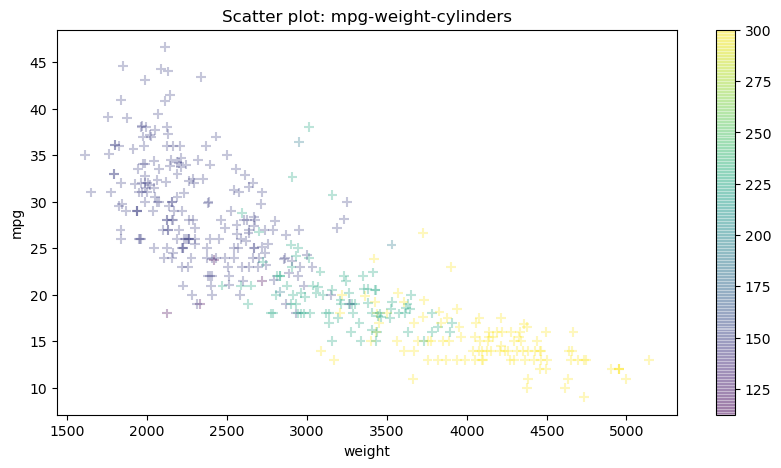

In [25]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10,5),
       cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)
plt.show()

## 파이 차트
파이 차트(pie chart)는 원을 파이 조각처럼 나누어서 표현한다. 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례한다.  
plot() 메소드에 kind='pie' 옵션을 사용하여 그린다.  

           mpg  cylinders  displacement    weight  acceleration  model_year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


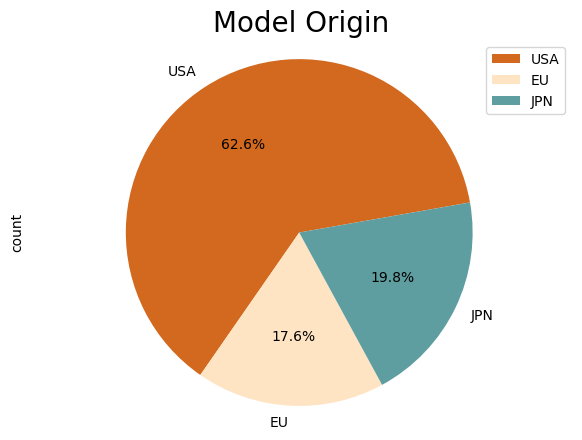

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default') # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement','horsepower', 'weight',
             'acceleration', 'model_year', 'origin', 'name']
# 데이터 개수 카운트를 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum() # origin 열을 기준으로 그룹화, 합계연산
print(df_origin.head())

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', "JPN"]

# 제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                       figsize = (7,5),
                       autopct = '%1.1f%%', # 퍼센트 % 표시
                       startangle = 10, # 파이 조각을 나누는 시작점(각도 표시
                       colors = ['chocolate', 'bisque', 'cadetblue'] # 색상 리스트
                       )
plt.title('Model Origin', size = 20)
plt.axis('equal') # 파이 차트의 비율을 같게 (원에 가깝게 조정)
plt.legend(labels=df_origin.index, loc='upper right') # 범례 표시
plt.show()

### 박스 플롯
박스 플롯(boxplot)은 범주형 데이터의 분포를 파악하는데 적합하다.

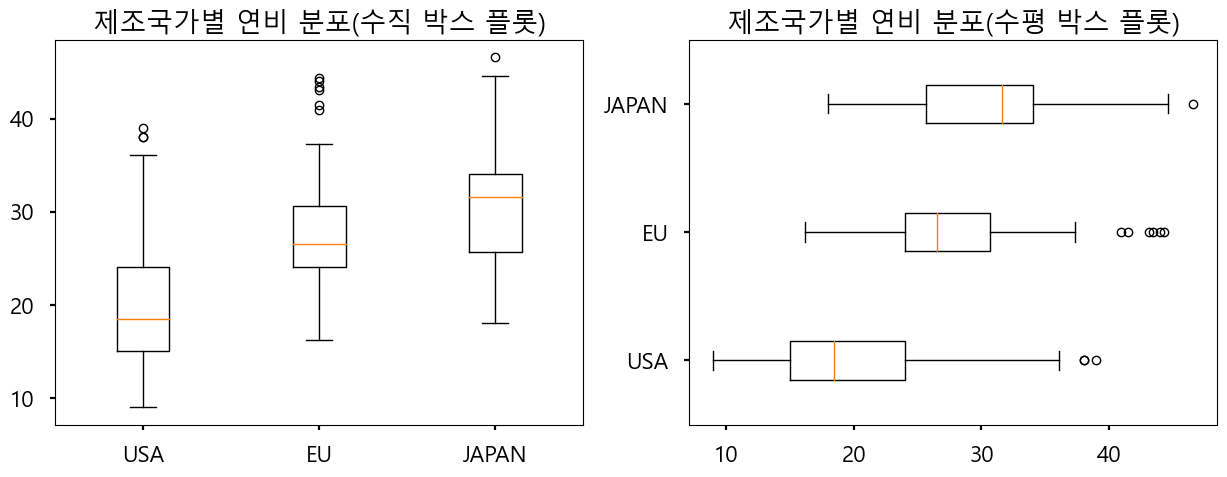

In [27]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('seaborn-poster')            # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

### 파이썬 그래프 갤러리
파이썬으로 그릴 수 있는 다양한 그래프와 설정 옵션을 참조할 수 있는 사이트(The Python Graph Gallery)를 소개한다.
여러가지 유용한 그래프 샘플과 실행 코드를 많이 담고 있다.
- 참조: <https://python-graph-gallery.com>

## Seaborn 라이브러리 - 고급 그래프 도구
Seaborn은 Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전이다. 비교적 단순한 인터페이스를 제공하기 때문에 초보자도 어렵지 않게 배울 수 있다.
- 데이터셋 가져오기
    - Seaborn 라이브러리에서 제공하는 `titanic` 데이터셋을 사용한다. Seaborn의 load_dataset() 함수를 사용하여 데이터프레임으로 가져온다.

In [28]:
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

### 회귀선이 있는 산점도
regplot() 함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타낸다.  
`fig_reg=False` 옵션을 설정하면 회귀선을 안 보이게 할 수 있다.

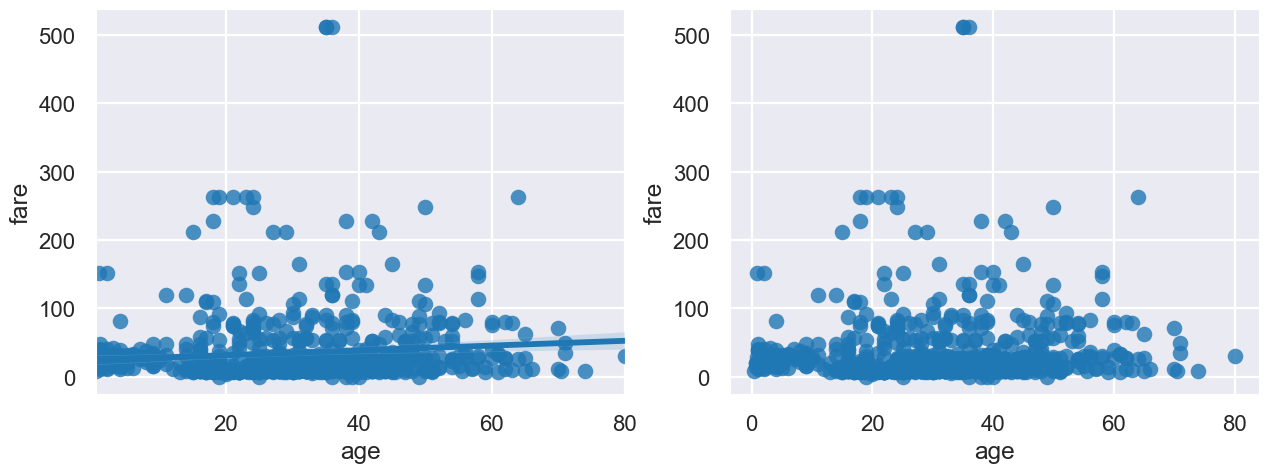

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시(fig_reg=True)
sns.regplot(x='age', # x 축 변수
           y='fare', # y 축 변수
           data = titanic, # 데이터
           ax = ax1) # axe 객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age', # x 축 변수
           y = 'fare', # y 축 변수
           data = titanic, # 데이터
           ax = ax2, # axe 객체 - 2번째 그래프
           fit_reg=False)
plt.show()

### 히스토그램/커널 밀도 그래프
단변수(하나의 변수) 데이터의 분포를 확인할 때 distplot() 함수를 이용한다.  
기본값으로 히스토그램과 커널 밀도 함수를 그래프로 출력한다.  
`hist=False` 옵션을 추가하면 히스토그램이 표시되지 않고, `kde=False` 옵션을 전달하면 커널 밀도 그래프를 표시하지 않는다.  
예제에서 타이타닉 운임('fare' 열)의 분포를 그리면 대부분 100달러 미만에 집중되어 있다.

C:\Users\singo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\singo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\singo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

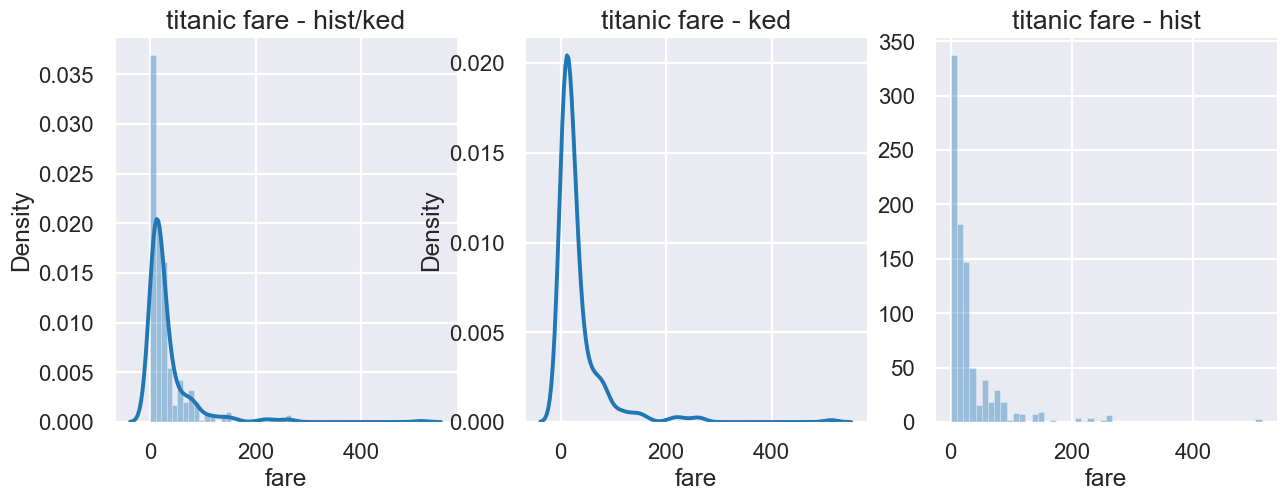

In [30]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.distplot(titanic['fare'], ax=ax1)

# hist=False
sns.distplot(titanic['fare'], hist=False, ax=ax2)

# kde=False
sns.distplot(titanic['fare'], kde=False, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

### 히트맵
Seaborn 라이브러리는 히트맵(heatmap)을 그리는 heatmap() 메소드를 제공한다.  
2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류한다.  
데이터프레임을 피벗테이블로 정리할 때 한 변수(`sex` 열)를 행 인덱스로 나머지 변수(`class` 열)를 열 이름으로 설정한다.  
`aggfunc = 'size'` 옵션은 데이터 값의 크기를 기준으로 집계한다는 뜻이다.

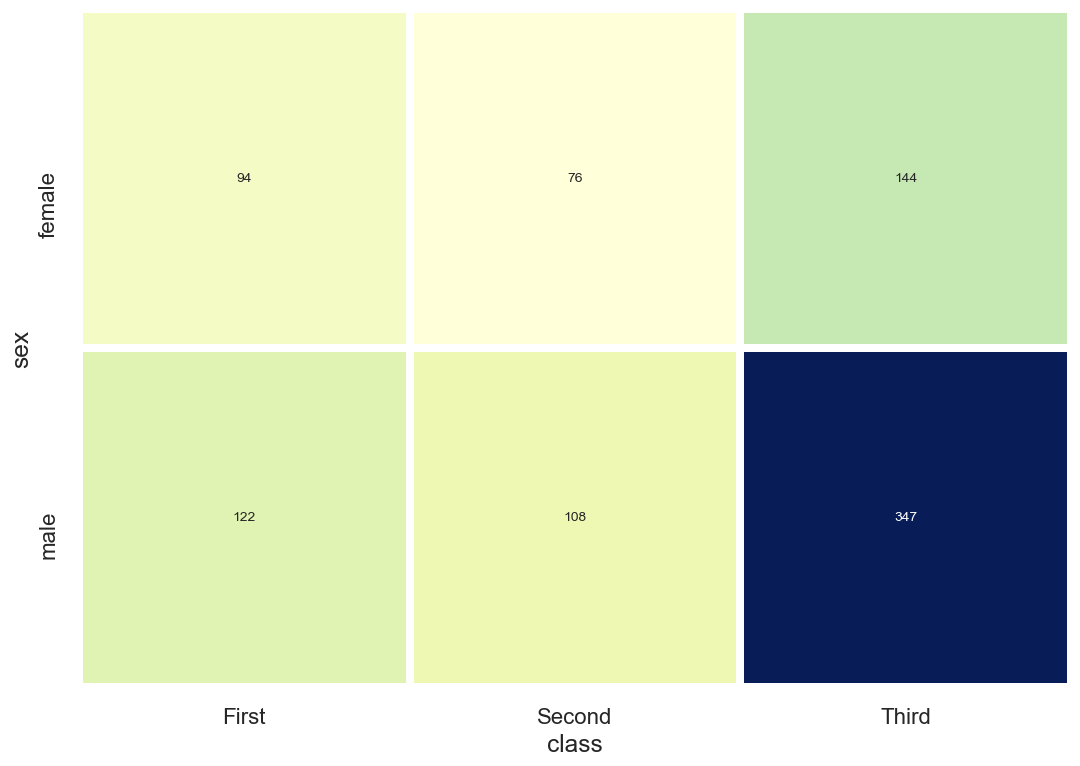

In [31]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table, # 데이터 프레임
           annot=True, fmt='d', # 데이터 값 표시 여부, 정수형 포맷
           cmap='YlGnBu', # 컬러 맵
           linewidth=5, # 구분 선
           cbar=False) # 컬러 바 표시 여부
plt.show()

### 범주형 데이터의 산점도
범주형 변수에 들어 있는 범주별 데이터의 분포를 확인하는 방법이다.  
stripplot() 함수와 swarmplot() 함수를 사용할 수 있다.  
swarmplot() 함수는 데이터의 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않도록 그린다.  
즉, 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있다.

C:\Users\singo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


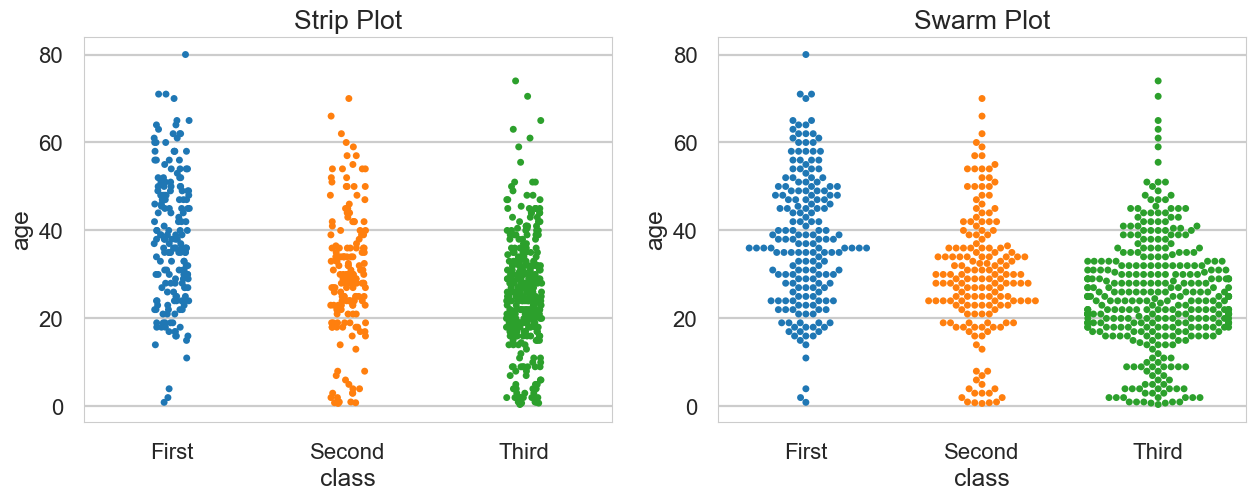

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 O)
sns.stripplot(x= 'class', # x축 변수
             y = 'age', # y축 변수
             data = titanic, # 데이터셋 - 데이터프레임
             ax= ax1 # axe 객체 - 1번째 그래프
             )
# 이산형 변수의 분포 - 데이터 분산 고려(중복 표시 X)
sns.swarmplot(x='class',
             y='age',
             data=titanic,
             ax=ax2
             )
# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

앞의 예제에서 `hue='sex'` 옵션을 stripplot() 함수 또는 swarmpplot() 함수에 추가하면, 'sex' 열의 데이터 값인 남녀 성별을 색상으로 구분하여 출력한다.

C:\Users\singo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


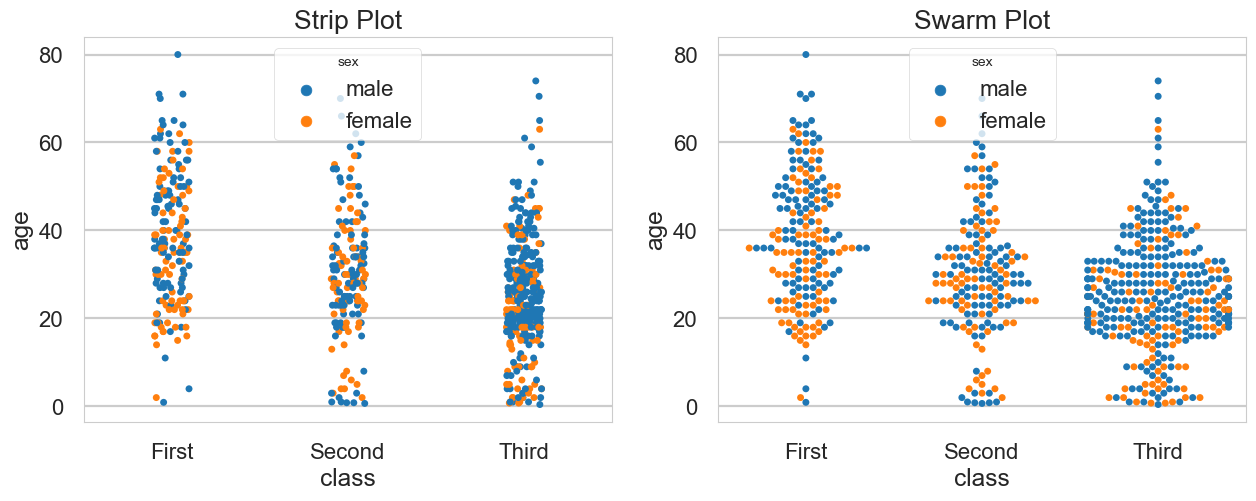

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 O)
sns.stripplot(x= 'class', # x축 변수
             y = 'age', # y축 변수
             data = titanic, # 데이터셋 - 데이터프레임
              hue='sex',
             ax= ax1 # axe 객체 - 1번째 그래프
             )
# 이산형 변수의 분포 - 데이터 분산 고려(중복 표시 X)
sns.swarmplot(x='class',
             y='age',
             data=titanic,
              hue='sex',
             ax=ax2
             )
# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

### 막대 그래프
막대 그래프를 그리는 barplot() 함수

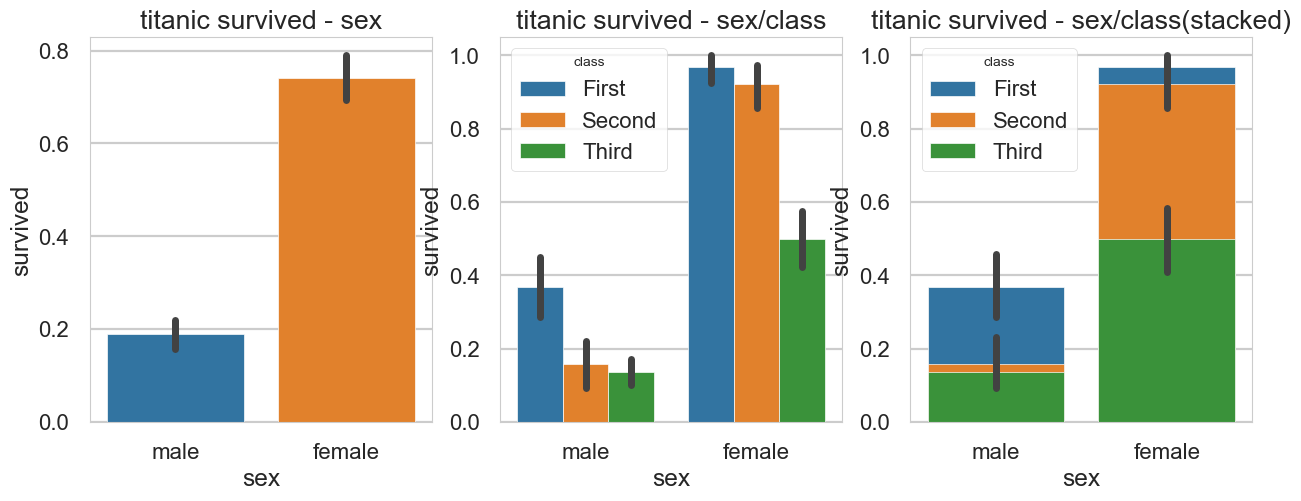

In [34]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

### 빈도 그래프
각 범주에 속하는 데이터의 개수를 막대 그래프로 나타내는 countplot() 함수를 소개한다.  
그래프 색 구성을 다르게 하려면 `palette` 옵션을 변경하여 적용한다.

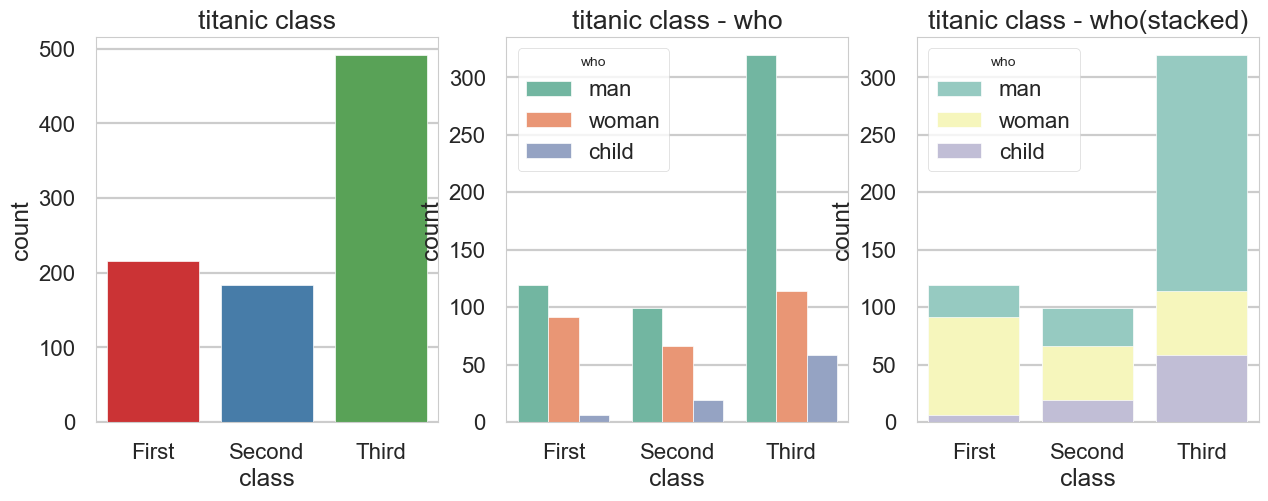

In [35]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)

# dodge=False 옵션 추가(축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

### 박스 플롯/바이올린 그래프
박스 플롯은 범주형 데이터 분포와 주요 통계 지표를 함께 제공한다.  
다만, 박스 플롯만으로는 데이터가 퍼져 있는 분산의 정도를 정확하게 알기는 어렵기 때문에 커널 밀도 함수 그래프를 y축 방향에 추가하여 바이올린 그래프를 그리는 경우도 있다.  
박스 플롯은 boxplot() 함수로 그리고 바이올린 그래프는 violinplot() 함수로 그린다.

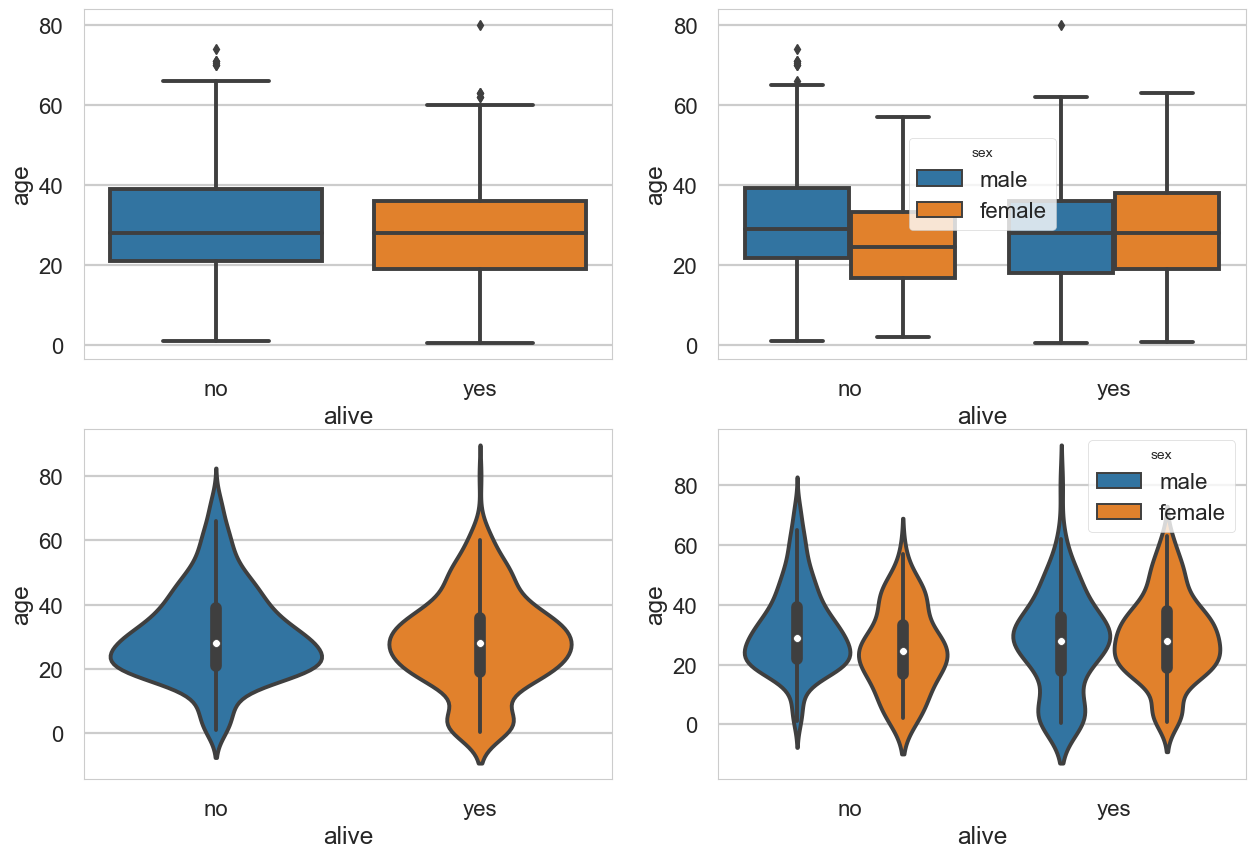

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지, darkgrid, whitegrid, dark, white, ticks)

# 그래프 객체 생성(figure에 4개의 서브 플롯 생성)
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스 플롯 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

# 박스 플롯 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

# 바이올린 그래프 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()


### 조인트 그래프
jointplot() 함수는 산점도를 기본으로 표시하고, x-y축에 각 변수에 대한 히스토그램을 동시에 보여준다.  
따라서 두 변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기 좋다.  
예제에서는 산점도(기본값), 회귀선 추가(`kind='reg'`), 육각 산점도(`kind='hex'`), 커널 밀집 그래프(`kind='kde'`) 순으로 조인트 그래프를 그리고 차이를 비교한다.

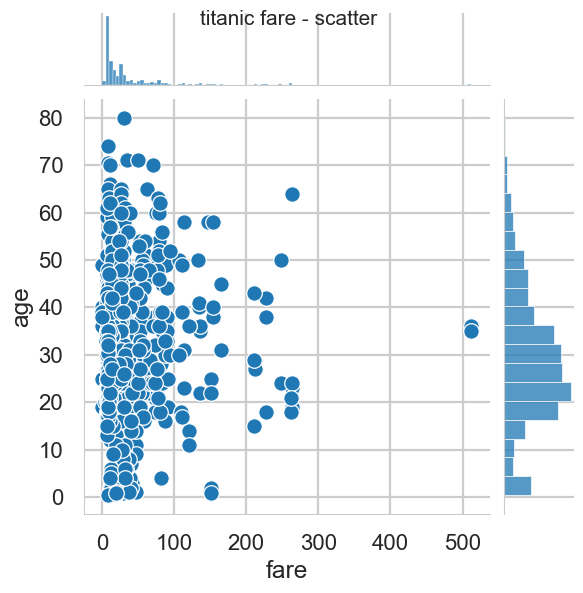

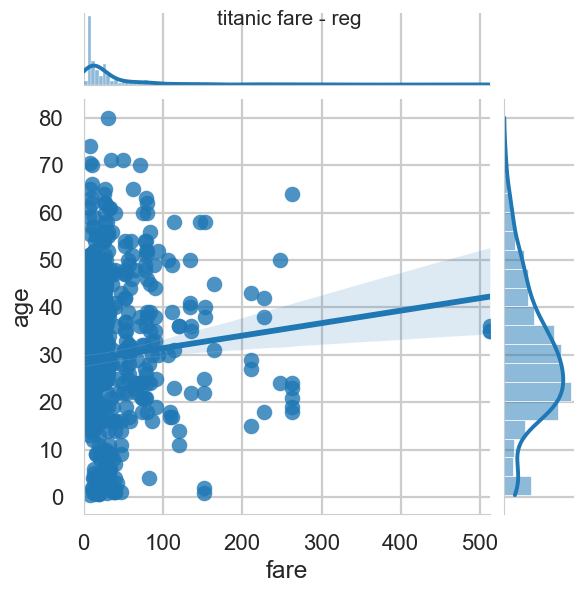

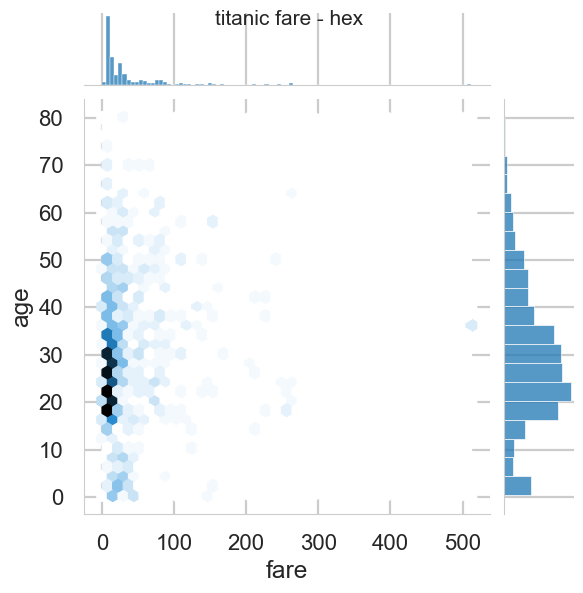

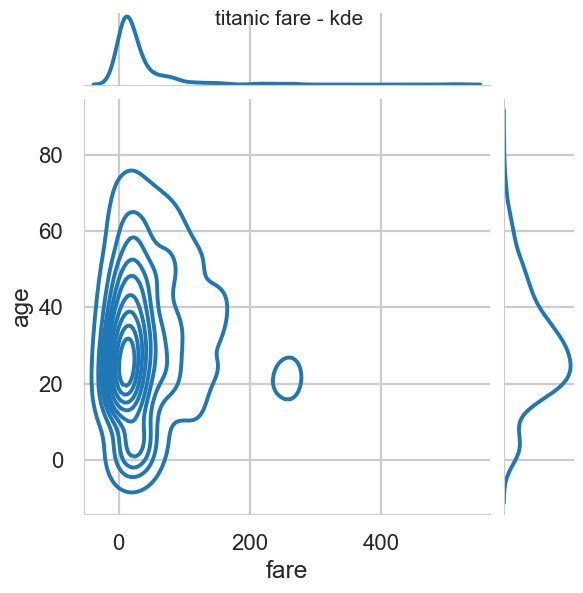

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)

# 조인트 그래프 - 육각그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)

# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x = 'fare', y='age', kind='kde', data=titanic)

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size = 15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

### 조건을 적용하여 화면을 그리드로 분할하기
FacetGrid() 함수는 행, 열 방향으로 서로 다른 조건을 적용하여 여러개의 서브 플롯을 만든다.  
그리고 각 서브 플롯에 적용할 그래프 종류를 map() 메소드를 이용하여 그리드 객체에 전달한다.

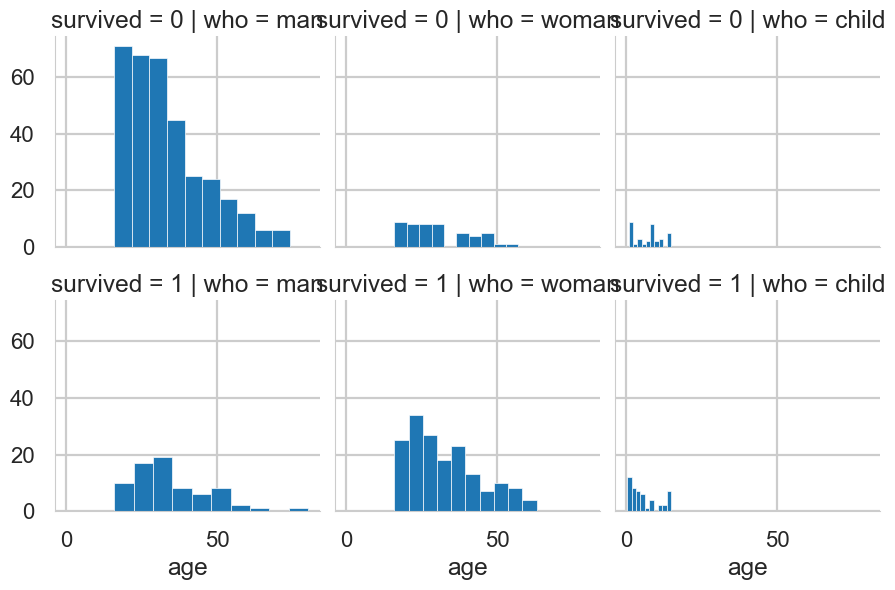

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived')

# 그래프 적용하기
g = g.map(plt.hist, 'age')

### 이변수 데이터의 분포
pairplot() 함수는 인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현한다.  
그래프를 그리기 위해 만들어진 짝의 개수만큼 화면을 그리드로 나눈다.  
같은 변수끼리 짝을 이루는 대각선 방향으로는 히스토그램을 그리고 서로 다른 변수간에는 산점도를 그린다.

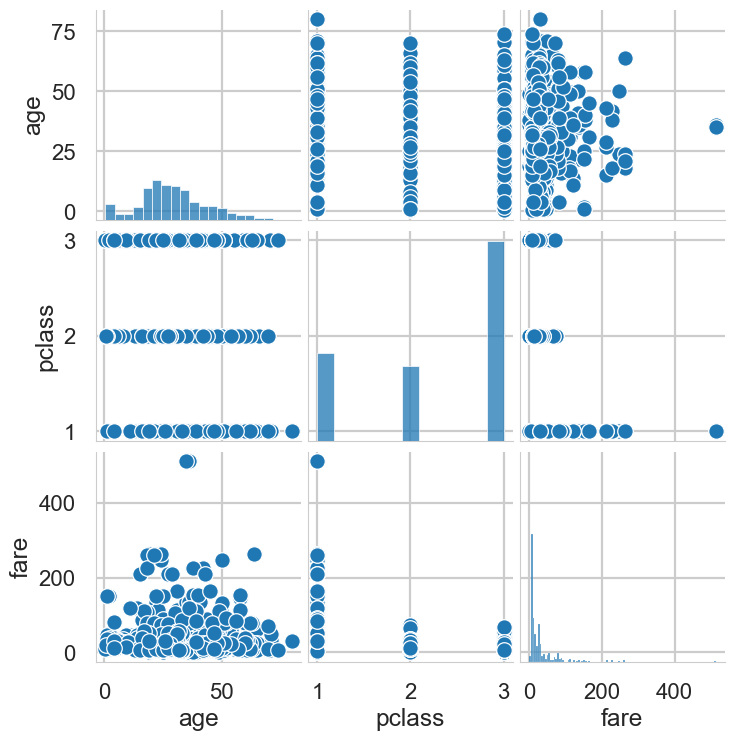

In [40]:
titanic_pair = titanic[['age', 'pclass', 'fare']]

# 조건ㄴ에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

# Folium 라이브러리 - 지도 활용
Folium 라이브러리는 지도 위에 시각화할 때 유용한 도구이다.  
세계 지도를 기본 지원하고 다양한 스타일의 지도 이미지를 제공하고 있다.  
- Folium 설치하기
    conda install -c conda-forge folium
- 지도 만들기
    Folium 라이브러리의 Map() 함수를 이용하면 간단하게 지도 객체를 만들 수 있다. 지도화면은 고정된 것이 아니고 줌(zoom) 기능과 화면 이동(scroll)이 모두 가능하다.  
Folium은 웹 기반 지도를 만들기 때문에 오직 웹 환경에서만 지도를 확인할 수 있다.  
지도를 보려면 지도 객체에 save()메소드를 적용하여 HTML파일로 저장하고, 웹 브라우저에서 파일을 열어 확인해야한다. 한편, Jupyter Notebook 등 웹 기반 IDE에서는 지도를 바로 확인 할 수 있다.

In [43]:
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

# 지도를 HTML 파일로 저장하기
# seoul_map.save('./seoul.html')

seoul_map

### 지도 스타일 적용하기
Map() 함수에 `tiles` 옵션을 적용하면 지도에 적용하는 스타일을 변경하여 지정할 수 있다.  
다음의 예제에서는 `Stamen Terrain` 맵과 `Stamen Toner`맵의 스타일을 비교한다.

In [45]:
import folium

# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                       zoom_start = 12)
seoul_map3 = folium.Map(location=[37.55, 126.98], tiles='Stamen Toner',
                       zoom_start = 15)


In [46]:
seoul_map2

In [47]:
seoul_map3

### 지도에 마커 표시하기
서울 시내 주요 대학교의 위치 데이터를 데이터프레임으로 변환하고, Folium 지도에 위치를 표시해 보자.  
마커 위치를 표시하려면 Marker()함수에 위도, 경도 정보를 전달한다.  
popup 옵션을 추가하면 마커를 클릭했을 때 팝업창에 표시해주는 텍스트를 넣을 수 있다.

In [49]:
import pandas as pd
import folium

# 대학교 리스트를 데이터프레임으로 변환
df = pd.read_excel('./서울지역 대학교 위치.xlsx', index_col=0)

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                      zoom_start = 12)

# 대학교 위치 정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)
    
seoul_map

In [51]:
import pandas as pd
import folium

# 대학교 리스트를 데이터프레임으로 변환
df = pd.read_excel('./서울지역 대학교 위치.xlsx', index_col=0)

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                      zoom_start = 12)

# 대학교 위치 정보를 CircleMaker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                       radius = 10,
                       color = 'brown',
                       fill = True,
                       fill_color = 'coral',
                       fill_opacity = 0.7,
                       popup = name
                       ).add_to(seoul_map)
seoul_map

### 지도 영역에 단계구분도(Choropleth Map) 표시하기
행정구역과 같이 지도 상의 어떤 경계에 둘러싸인 영역에 색을 칠하거나 음영 등으로 정보를 나타내는 시각화 방법이다.  
전달하려는 정보의 값이 커지면 영역에 칠해진 색이나 음영이 진해진다.  
Choropleth()함수를 이용한다.

In [52]:
import pandas as pd
import folium
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = './경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = './경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502, 126.982],
                  tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택(2007-2017년 중에서 선택)
year = '2007' #2007년

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data = geo_data, # 지도 경계
                 data = df[year], #표시하려는 데이터
                 columns = [df.index, df[year]], #열 지정
                 fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity=0.3,
                 threshold_scale = [10000, 100000, 300000, 500000, 700000],
                 key_on = 'feature.properties.name',
                 ).add_to(g_map)
g_map